In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\P.BINNITH REDDY\OneDrive\Desktop\Wholesale customers data.csv")

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info

<bound method DataFrame.info of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4

In [5]:
df.shape

(440, 8)

In [6]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
435    False
436    False
437    False
438    False
439    False
Length: 440, dtype: bool

In [8]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [9]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [10]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# standard normalization

In [11]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler()
X=stscaler.fit_transform(df)

In [12]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [13]:
import scipy.cluster.hierarchy as sch

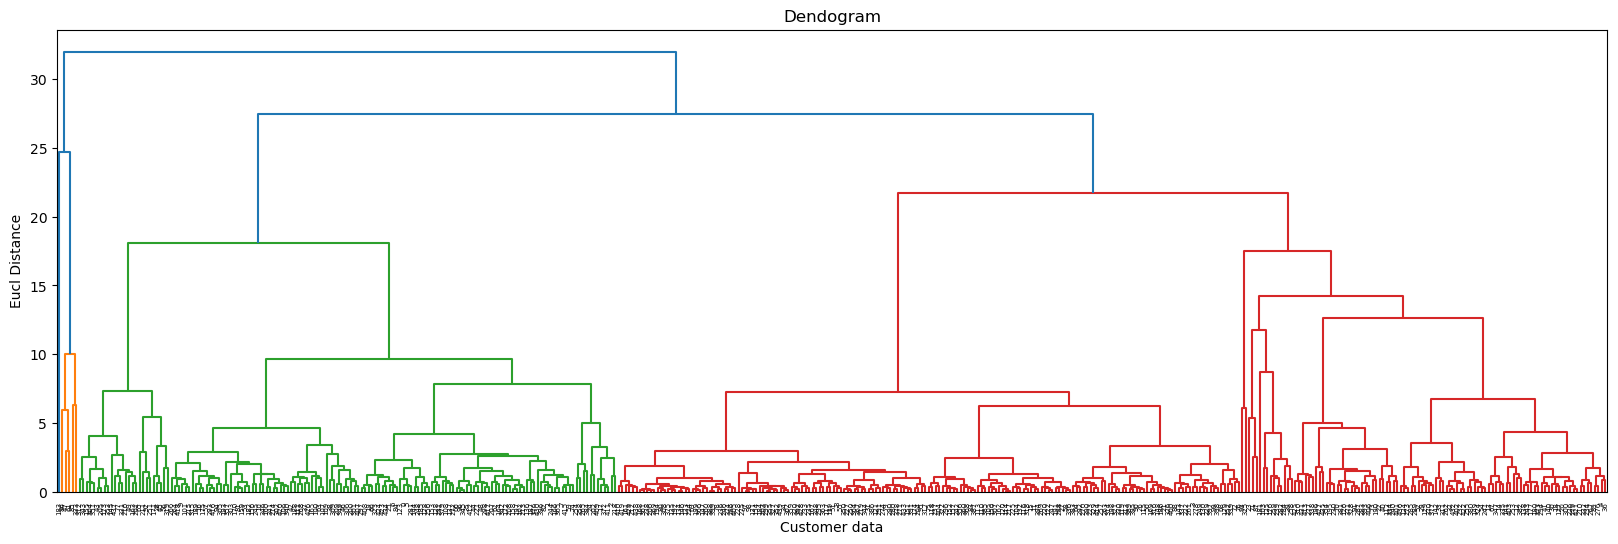

In [14]:
plt.figure(figsize=(20,6))
dendo = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show()

In [15]:
len(set(dendo['color_list']))-1

3

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
model = AgglomerativeClustering(n_clusters=3)
cluster=model.fit_predict(X)



In [18]:
cluster.shape


(440,)

In [19]:
group_num=pd.DataFrame(cluster,columns=['Group'])
group_num

,Group
0,2
1,2
2,2
3,1
4,1
...,...
435,1
436,1
437,2
438,1


In [20]:
pd.concat([df,group_num],axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [21]:
from sklearn.metrics import silhouette_score
silhouette_score(X,cluster)

0.2646091480214908

# K Means

In [22]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [23]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [24]:
wcss

[2266.955266583245,
 1644.059851234756,
 1326.6746082135533,
 1070.2551995135616,
 989.3326418885057,
 856.7070228388114,
 791.8280762163155,
 710.1943394067517,
 668.22250548469]

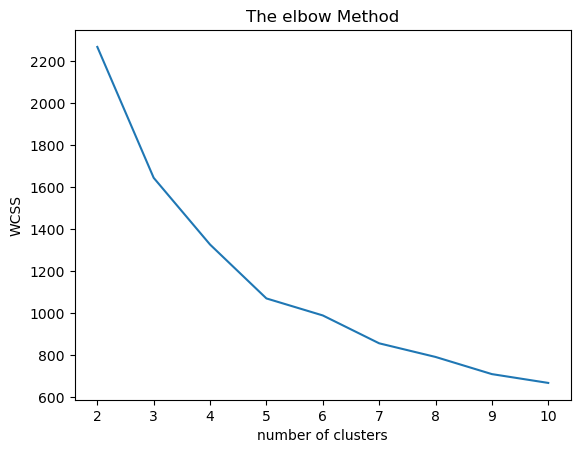

In [25]:
plt.plot(range(2,11),wcss)
plt.title('The elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[3 0 0 3 3 3 3 3 3 0 0 3 0 0 0 3 0 3 3 3 3 3 3 1 0 3 3 3 0 3 3 3 3 3 3 0 3
 0 0 3 3 3 0 0 0 0 0 2 0 0 3 3 3 0 3 3 2 0 3 3 3 2 3 0 3 2 3 0 3 3 3 1 3 3
 3 3 3 0 3 3 3 0 0 3 3 2 2 1 3 3 3 3 2 1 0 3 3 3 3 3 0 0 0 3 3 3 0 0 0 0 3
 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3
 3 3 3 3 3 3 3 0 0 3 0 0 0 3 3 0 0 0 0 3 3 3 0 0 3 0 3 0 3 3 3 3 3 1 0 1 3
 3 3 0 0 0 3 3 3 0 3 3 3 0 3 3 0 0 3 3 3 0 3 3 3 0 3 2 3 0 0 0 0 3 0 3 3 0
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 2 3 3 0 3 3 3 3
 3 3 3 3 3 0 0 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3
 3 3 0 3 3 0 0 0 0 0 0 3 3 0 3 3 0 3 3 0 3 3 3 0 3 3 3 3 3 1 3 3 3 3 3 0 3
 2 3 3 3 3 3 3 0 0 0 0 3 3 0 3 3 0 3 0 3 0 3 3 3 0 0 3 3 3 3 3 3 0 3 3 3 3
 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3
 0 3 3 3 3 0 3 3 3 0 0 0 3 0 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3 3 0 3 3]


In [28]:
df.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


In [29]:
model = KMeans(n_clusters = 5, random_state = 309)
groups = model.fit_predict(X)

In [30]:
groups

array([2, 0, 0, 2, 4, 2, 2, 2, 2, 0, 0, 2, 4, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       4, 0, 0, 2, 2, 2, 0, 4, 2, 2, 2, 4, 2, 0, 4, 0, 0, 4, 4, 2, 0, 0,
       0, 0, 0, 3, 0, 0, 2, 2, 4, 0, 2, 2, 3, 0, 2, 2, 2, 3, 2, 0, 2, 3,
       2, 0, 2, 2, 4, 0, 2, 4, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 3, 3, 4,
       2, 4, 2, 2, 3, 4, 0, 2, 2, 2, 2, 2, 0, 0, 2, 4, 2, 2, 0, 0, 2, 0,
       2, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 0, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       4, 2, 2, 2, 2, 4, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 4, 4, 0,
       2, 2, 0, 0, 4, 2, 2, 0, 2, 2, 2, 0, 2, 3, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 3, 2, 4, 0, 4, 2, 2, 4, 4, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,

In [31]:
type(groups)

numpy.ndarray

In [32]:
df.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


In [33]:
group_num=pd.DataFrame(groups,columns=['Group'])
group_num

,Group
0,2
1,0
2,0
3,2
4,4
...,...
435,4
436,4
437,0
438,2


In [34]:
cust_kmeans_data=pd.concat([df,group_num],axis=1)
cust_kmeans_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,4
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,4
436,39228,1431,764,4510,93,2346,4
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,2


In [38]:
cust_kmeans_data[cust_kmeans_data['Group']==4]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
4,22615,5410,7198,3915,1777,5185,4
12,31714,12319,11757,287,3881,2931,4
22,31276,1917,4469,9408,2381,4334,4
29,43088,2100,2609,1200,1107,823,4
33,29729,4786,7326,6130,361,1083,4
...,...,...,...,...,...,...,...
425,11243,2408,2593,15348,108,1886,4
427,31012,16687,5429,15082,439,1163,4
431,8533,5506,5160,13486,1377,1498,4
435,29703,12051,16027,13135,182,2204,4


In [40]:
np.round(silhouette_score(X,groups),2)

0.37

# DBSCAN 

In [41]:
from sklearn.cluster import DBSCAN


In [ ]:
dbscan = DBSCAN(eps=3.2, min_sam